卷积是一种非常常见，小巧但十分强大的数学工具，如果用得好，不仅可以快速完成工作，而且不同的卷积在图像上会带来别样的风格化。

在我的博客里，提到卷积以及卷积计算时，我通常都是手写计算过程，主要考虑这些过程能帮助不太熟悉的朋友。但是OpenCV本身自带有非常强大的卷积计算工具，现在我们来看看怎么使用。

# 函数说明

卷积计算，可以把卷积核应用到图片上。该函数允许将任意线性 filter 应用于图像。当光圈部分在图像之外时，该函数会根据指定的边框模式对异常像素值进行插值。

$$dst(x, y) = \sum kernel(x', y') * src(x + x' - anchor.x, y + y' - anchor.y)$$

anchor 不用太关心，这个是指的kernel中心锚点，默认为（-1，-1）也就是内核的中心。

# 函数原型
接下来我们看看函数原型

```cpp
void cv::filter2D(
	InputArray 	src,	// 输入的2D图像
	OutputArray dst,	// 输出的2D图像
	int 	ddepth,		// 目标图像的所需数据深度
	InputArray 	kernel,	// 2D卷积核
	Point 	anchor = Point(-1,-1), // 中心锚点，通常不用处理
	double 	delta = 0,	// 希望在dst的每个像素上增加的值
	int 	borderType = BORDER_DEFAULT // 边界处理模式，采用默认模式
)	
```

稍微有点麻烦的是 ddepth 这个参数，它其实就是指定输出的数据长度，或者说数据类型。官方给出的表如下：

![在这里插入图片描述](https://img-blog.csdnimg.cn/27ec2363b59a4ebd9375c35cc0e6ad92.png?x-oss-process=image/watermark,type_ZHJvaWRzYW5zZmFsbGJhY2s,shadow_50,text_Q1NETiBA5omT56CB55qE6Zi_6YCa,size_20,color_FFFFFF,t_70,g_se,x_16#pic_center)
你如果不确定自己需要什么输出，可以直接给他赋值 -1 即可，它会采用和输入图像相似或相同的数据配置。

# Python 例程

最近因为出差，家里配置有C环境的电脑没带在身上，所以只好先用写这个Python版本的示例代码，我想对于应该也很容易移植到C++上的。

在这个例程里，我想用比较有意思的一个内核来说明它怎么使用的。

首先我们要定义一个只有中间是1的内核，以 5x5 为例，它长这样

![在这里插入图片描述](https://img-blog.csdnimg.cn/aa99a713105e49a9a39de0f71c09a1e4.png#pic_center)


而这个核比较特殊，如果想要比较好的表现，就要把它设置稍微大一点，所以我们设置为15。

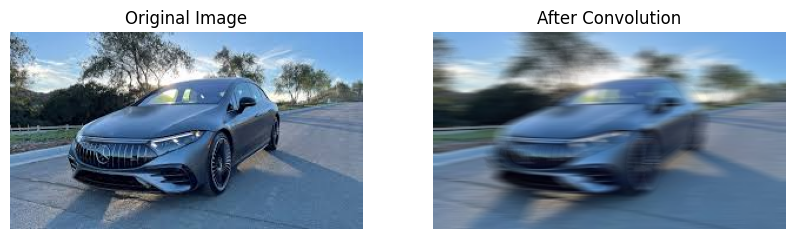

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 指定卷积核大小
kernel_size = 15

# 创建水平卷积核
kernel_h = np.zeros((kernel_size, kernel_size))

# 填充中间行
kernel_h[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)

# 归一化
kernel_h /= kernel_size

# 加载图像
img = cv2.imread('/opt/images/vehicle.png')

# 将图像从BGR转换为RGB格式以便在matplotlib中正确显示
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 应用水平卷积核
horizon_mb = cv2.filter2D(img, -1, kernel_h)

# 将卷积后的图像转换为RGB格式
horizon_mb_rgb = cv2.cvtColor(horizon_mb, cv2.COLOR_BGR2RGB)

# 显示原始图像和卷积后的图像
plt.figure(figsize=(10, 5))

# 原始图像
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# 卷积后的图像
plt.subplot(1, 2, 2)
plt.imshow(horizon_mb_rgb)
plt.title('After Convolution')
plt.axis('off')

# 显示图像
plt.show()